### DemAapp04:
# Uniform-node and Chebyshev-node polynomial approximation of Runge's function and compute condition numbers of associated interpolation matrices

*TODO  fix this demo: figures are not the same as in matlab*

In [1]:
import numpy as np
from numpy.linalg import norm, cond
np.set_printoptions(precision=4, linewidth=120, suppress=True)
from compecon import Basis, BasisChebyshev, Interpolator
from compecon.tools import nodeunif
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#from matplotlib import rcParams as settings
import seaborn as sns
sns.set_style('dark')
%matplotlib notebook

C:\Program Files\Anaconda3\lib\site-packages\IPython\kernel\__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


Runge function
$$f(x) = \frac{1}{1 +25x^2} $$

In [2]:
runge = lambda x: 1 / (1 + 25 * x ** 2)

Set points of approximation interval

In [3]:
a, b = -1, 1

Construct plotting grid

In [4]:
nplot = 1001
x = np.linspace(a, b, nplot)
y = runge(x)

Plot Runge's Function

<IPython.core.display.Javascript object>


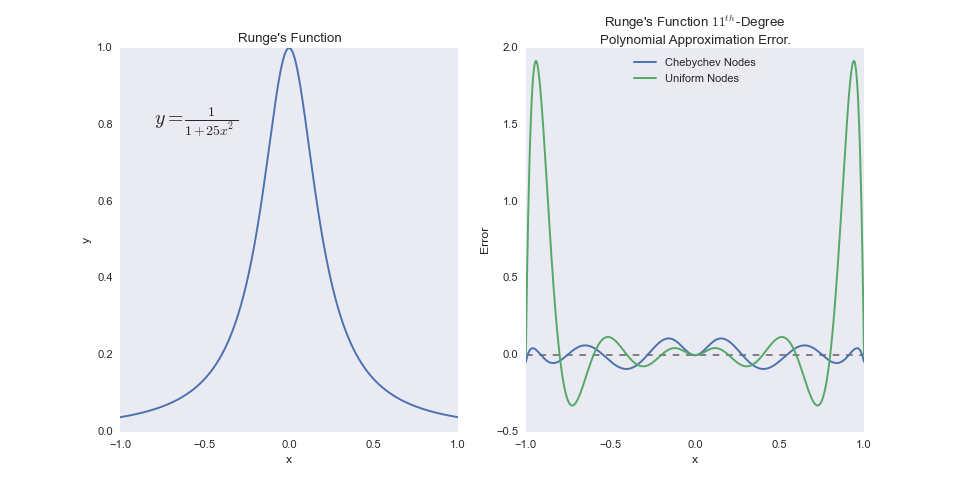

In [5]:
fig1 = plt.figure(figsize=[12, 6])
ax1 = fig1.add_subplot(121, title="Runge's Function", xlabel='x', ylabel='y')
ax1.plot(x, y)
ax1.text(-0.8, 0.8, r'$y = \frac{1}{1+25x^2}$', fontsize=18)

## Approximation errors
Compute approximation errors on refined grid and interpolation matrix condition numbers

In [6]:
n = np.arange(3, 33, 2)
nn = n.size
errunif, errcheb = (np.zeros([nn, nplot]) for k in range(2))
nrmunif, nrmcheb, conunif, concheb = (np.zeros(nn) for k in range(4))

for i in range(nn):
    # Uniform-node monomial-basis approximant
    xnodes = np.linspace(a, b, n[i])
    c = np.polyfit(xnodes, runge(xnodes), n[i])
    yfit = np.polyval(c, x)
    phi = xnodes.reshape(-1, 1) ** np.arange(n[i])

    errunif[i] = yfit - y
    nrmunif[i] = np.log10(norm(yfit - y, np.inf))
    conunif[i] = np.log10(cond(phi, 2))

    # Chebychev-node Chebychev-basis approximant
    yapprox = Interpolator(n[i], a, b, type='chebyshev', y=runge)
    yfit = yapprox(x)[0]  # index zero is to eliminate one dimension
    phi = yapprox.interpolation()
    errcheb[i] = yfit - y
    nrmcheb[i] = np.log10(norm(yfit - y, np.inf))
    concheb[i] = np.log10(cond(phi, 2))

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)
C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:5

Plot Chebychev- and uniform node polynomial approximation errors

In [7]:
ax2 = fig1.add_subplot(122, title="Runge's Function $11^{th}$-Degree\nPolynomial Approximation Error.",
                       xlabel='x',ylabel='Error')
ax2.axhline(color='gray', linestyle='--')
ax2.plot(x, errcheb[4], label='Chebychev Nodes')
ax2.plot(x, errunif[4], label='Uniform Nodes')
ax2.legend(loc='upper center', frameon=False)
fig1.show()

Plot approximation error per degree of approximation

<IPython.core.display.Javascript object>


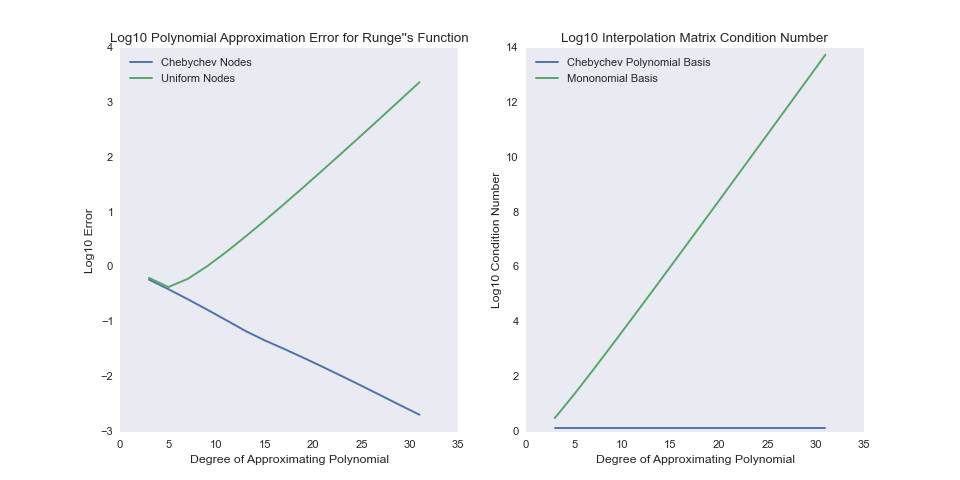

In [8]:
fig2 = plt.figure(figsize=[12, 6])
ax3 = fig2.add_subplot(121, title="Log10 Polynomial Approximation Error for Runge''s Function",
                       xlabel='Degree of Approximating Polynomial',ylabel='Log10 Error')
ax3.plot(n, nrmcheb, label='Chebychev Nodes')
ax3.plot(n, nrmunif, label='Uniform Nodes')
ax3.legend(loc='upper left', frameon=False)

ax4 = fig2.add_subplot(122, title="Log10 Interpolation Matrix Condition Number",
                       xlabel='Degree of Approximating Polynomial',ylabel='Log10 Condition Number')
ax4.plot(n, concheb, label='Chebychev Polynomial Basis')
ax4.plot(n, conunif, label='Mononomial Basis')
ax4.legend(loc='upper left', frameon=False)
fig2.show()